# <span style='color:red'> EDA, FE and Classification Model (Census Income Dataset) </span>

**<span style='color:blue'> 1. EDA and FE </span>**

1.Data Profiling

2.Stastical analysis

3.Graphical Analysis

4.Data Cleaning

5.Data Scaling

**<span style='color:blue'>2. Logistic Regression Model </span>**

1.Linear Regression Model

2.Performance metrics for above model

3.Hyper-Parameter Tuning for above model

**<span style='color:blue'>3. Support Vector Classifier Model </span>**

1.Support Vector Classifier Model

2.Performance metrics for above model

3.Hyper-Parameter Tuning for above model


Dataset: https://archive.ics.uci.edu/ml/datasets/Census+Income

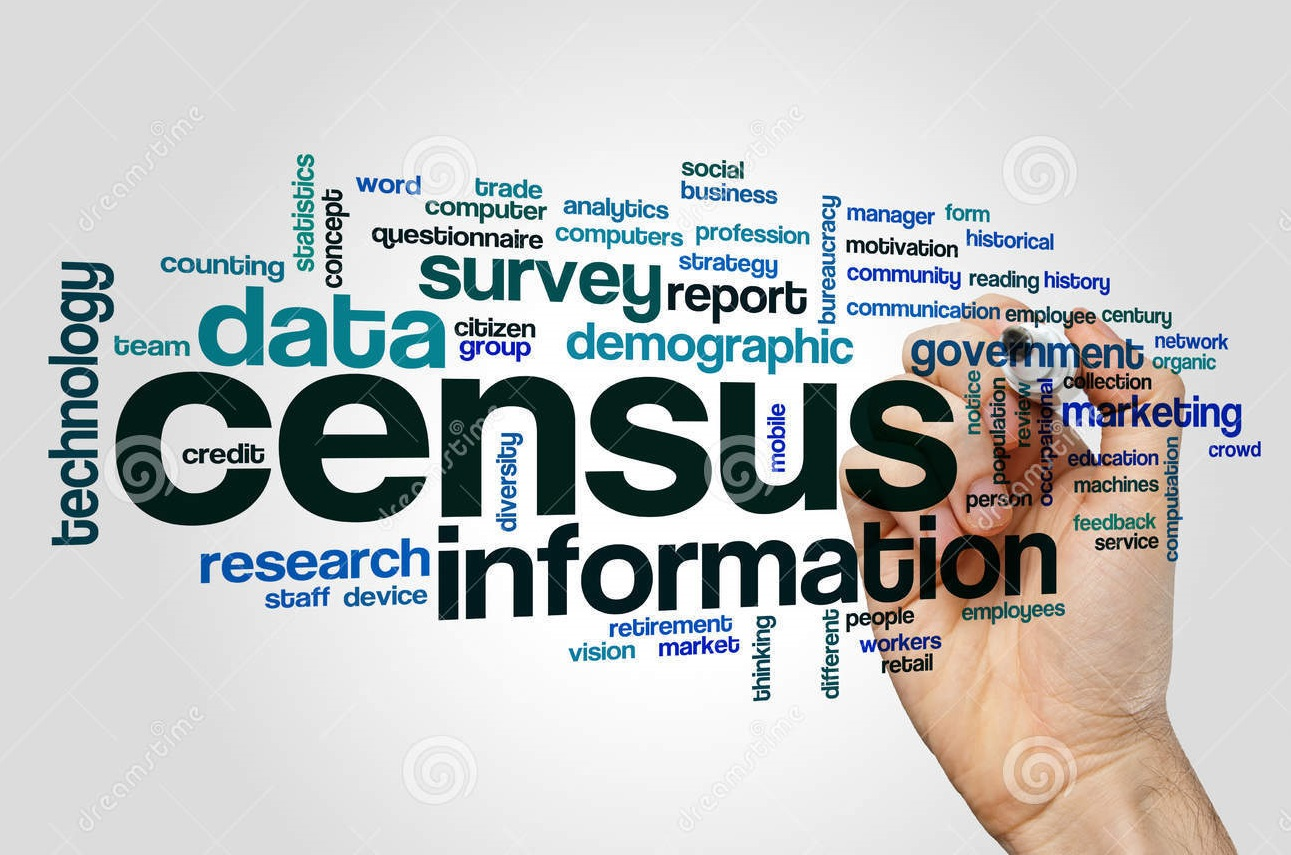

In [1]:
from IPython import display
display.Image('Desktop/Datasets/census.jpg')

# <span style='color:red'> 1.0 Importing required libraries </span>

In [1]:
### Pandas and Numpy
import pandas as pd
import numpy as np

### Visualisation libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### For Q-Q Plot
import scipy.stats as stats

### To ignore warnings
import warnings
warnings.filterwarnings('ignore')


# <span style='color:red'> 2.0 Importing Dataset and Data Cleaning </span>

In [2]:
### importing both train and test dataset
column_names=['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship',
             'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'salary']

datasetp1=pd.read_csv('Desktop/Datasets/adult.csv',names=column_names,header=None)
datasetp2=pd.read_csv('Desktop/Datasets/adult1.csv',names=column_names,header=None)

In [3]:
datasetp1.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
datasetp2.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [5]:
### joining both dataset and resetting index
dataset= pd.concat([datasetp1,datasetp2])
dataset.reset_index(inplace=True)

In [6]:
## dropping index feature as it is not required
dataset.drop('index',axis=1,inplace=True)

In [7]:
dataset.shape

(48842, 15)

In [8]:
### getting column names
dataset.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'salary'],
      dtype='object')

In [9]:
dataset.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# <span style='color:red'> 2.1 Dataset Information </span>

**Extraction was done by Barry Becker from the 1994 Census database. A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0))**

**Prediction task is to determine whether a person makes over 50K a year.**

**Attribute Information:**

**Listing of attributes:**

1.50K, <=50K.

2.age: continuous.

3.workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

4.fnlwgt: continuous.

5.education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

6.education-num: continuous.

7.marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

8.occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

9.relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

10.race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

11.sex: Female, Male.

12.capital-gain: continuous.

13.capital-loss: continuous.

14.hours-per-week: continuous.

15.native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

In [10]:
### getting count of values in salary feature which is dependent feature

### Data cleaning is required as there is additional . which is creating 2 more categories

dataset.salary.value_counts()

 <=50K     24720
 <=50K.    12435
 >50K       7841
 >50K.      3846
Name: salary, dtype: int64

In [11]:
### checking duplicates in dataset
dataset[dataset.duplicated()].shape

(29, 15)

In [12]:
dataset.duplicated().sum()

29

In [13]:
dataset.drop_duplicates(inplace=True)

In [14]:
dataset[dataset.duplicated()].shape

(0, 15)

In [15]:
### replacing . in salary feature 
dataset['salary']=dataset['salary'].str.replace('<=50K.','<=50K',regex=True)
dataset['salary']=dataset['salary'].str.replace('>50K.','>50K',regex=True)

In [16]:
### salary feature is clean and is divided into two categories 
dataset.salary.value_counts()

 <=50K    37128
 >50K     11685
Name: salary, dtype: int64

In [17]:
### Checking null values in dataset
dataset.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
salary            0
dtype: int64

In [18]:
### checking unique categories in categorical features and unique values in numerical features

for feature in dataset.columns:
     print("Feature '{}' has these {} unique values\n".format(feature,dataset[feature].unique()))

Feature 'age' has these [39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87 89] unique values

Feature 'workclass' has these [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked'] unique values

Feature 'fnlwgt' has these [ 77516  83311 215646 ... 173449  89686 350977] unique values

Feature 'education' has these [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th'] unique values

Feature 'education_num' has these [13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8] unique values

Feature 'marital_status' has these [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-sp

# <span style='color:blue'> Observations </span>

1.All categorical features have space and dash which requires cleaning.

2.Some categorical features like workclass, occupation, and native_country have ? as a value, it also requires cleaning.

In [19]:
### checking datatypes and null values in dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48813 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48813 non-null  int64 
 1   workclass       48813 non-null  object
 2   fnlwgt          48813 non-null  int64 
 3   education       48813 non-null  object
 4   education_num   48813 non-null  int64 
 5   marital_status  48813 non-null  object
 6   occupation      48813 non-null  object
 7   relationship    48813 non-null  object
 8   race            48813 non-null  object
 9   sex             48813 non-null  object
 10  capital_gain    48813 non-null  int64 
 11  capital_loss    48813 non-null  int64 
 12  hours_per_week  48813 non-null  int64 
 13  native_country  48813 non-null  object
 14  salary          48813 non-null  object
dtypes: int64(6), object(9)
memory usage: 6.0+ MB


# <span style='color:red'> 3.0 Numerical and Categorical features </span>

# <span style='color:red'>  3.1 Categorical features </span>

In [20]:
### Getting categorical features in dataset

categorical_feature= [feature for feature in dataset.columns if dataset[feature].dtypes=='O']
print(categorical_feature)

['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'salary']


In [21]:
### Getting count of each category in each categorical feature
for feature in categorical_feature:
    print('feature name: {} \n{}\n'.format(feature,dataset[feature].value_counts()))

feature name: workclass 
 Private             33879
 Self-emp-not-inc     3861
 Local-gov            3136
 ?                    2799
 State-gov            1981
 Self-emp-inc         1694
 Federal-gov          1432
 Without-pay            21
 Never-worked           10
Name: workclass, dtype: int64

feature name: education 
 HS-grad         15777
 Some-college    10869
 Bachelors        8020
 Masters          2656
 Assoc-voc        2060
 11th             1812
 Assoc-acdm       1601
 10th             1389
 7th-8th           954
 Prof-school       834
 9th               756
 12th              656
 Doctorate         594
 5th-6th           508
 1st-4th           245
 Preschool          82
Name: education, dtype: int64

feature name: marital_status 
 Married-civ-spouse       22372
 Never-married            16098
 Divorced                  6630
 Separated                 1530
 Widowed                   1518
 Married-spouse-absent      628
 Married-AF-spouse           37
Name: marital_status, d

# <span style='color:blue'> Observations </span>

1. workclass has 2799 , occupation has 2809, and native_country has 856 ? as a value.

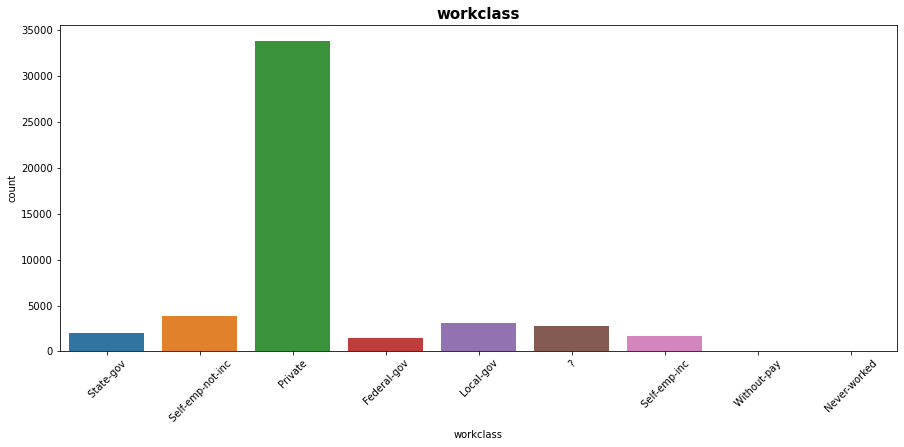

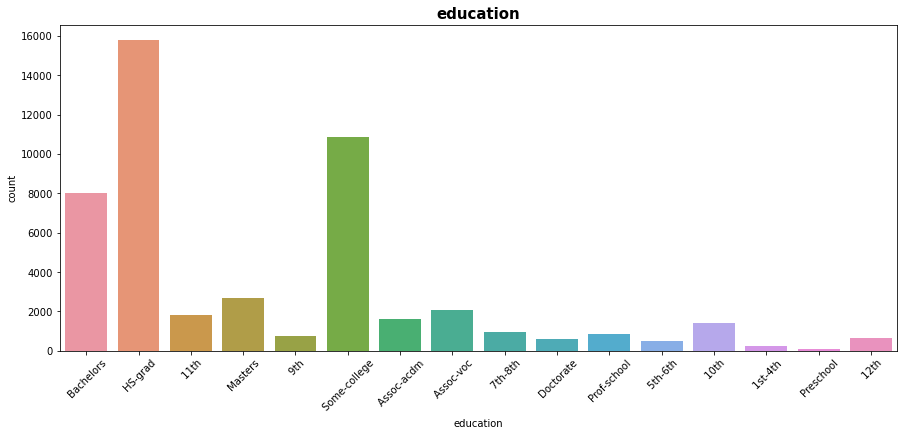

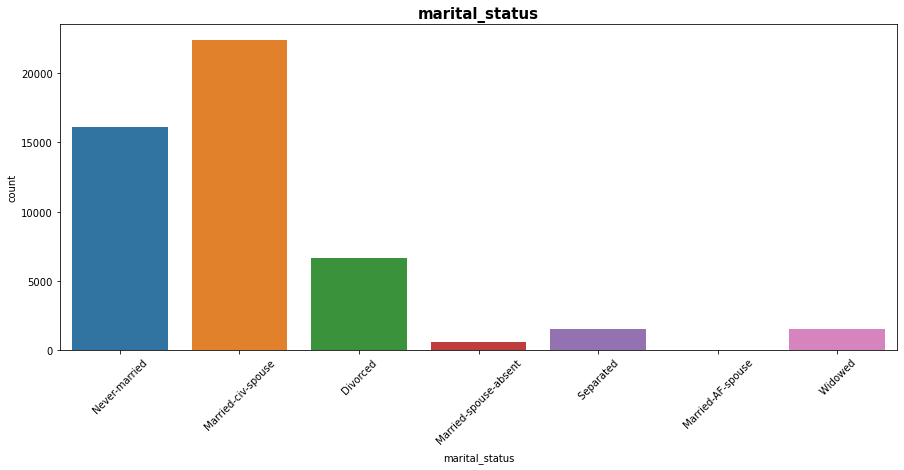

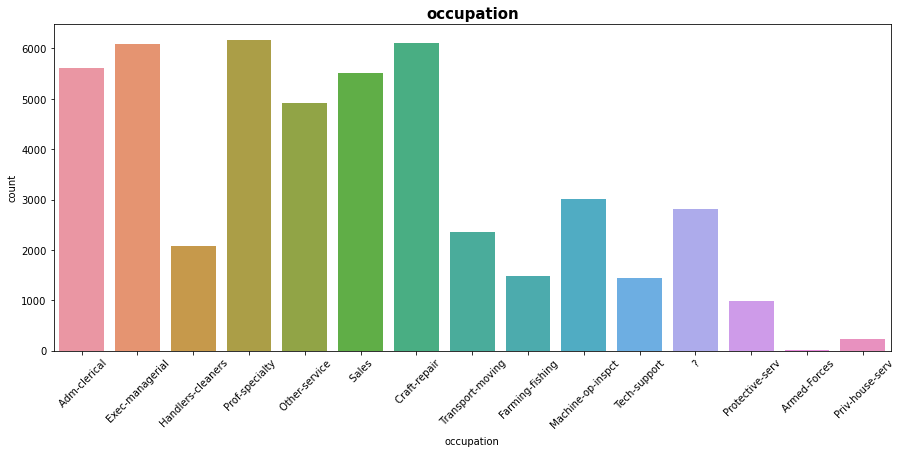

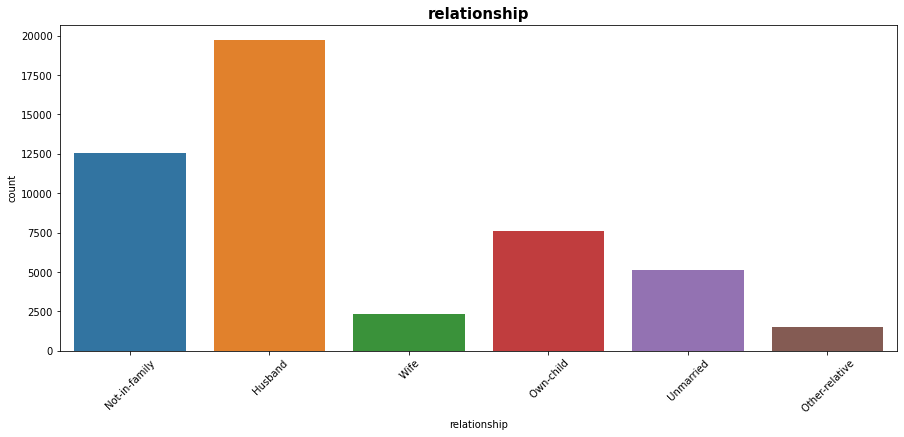

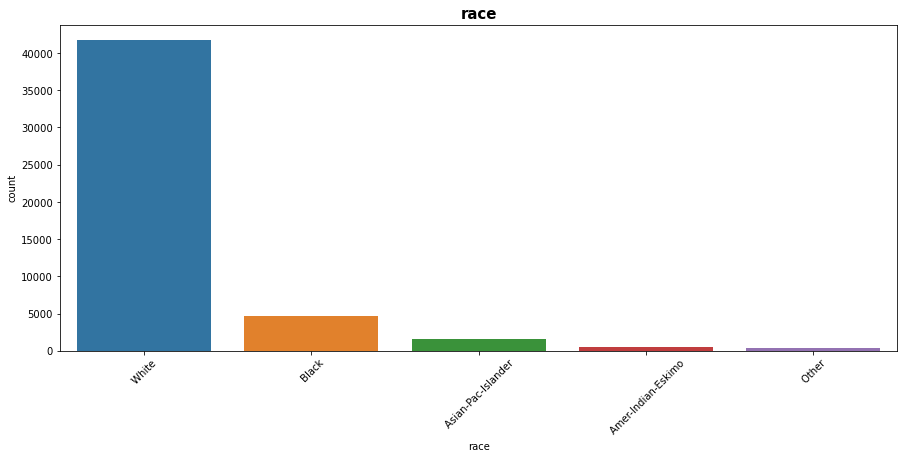

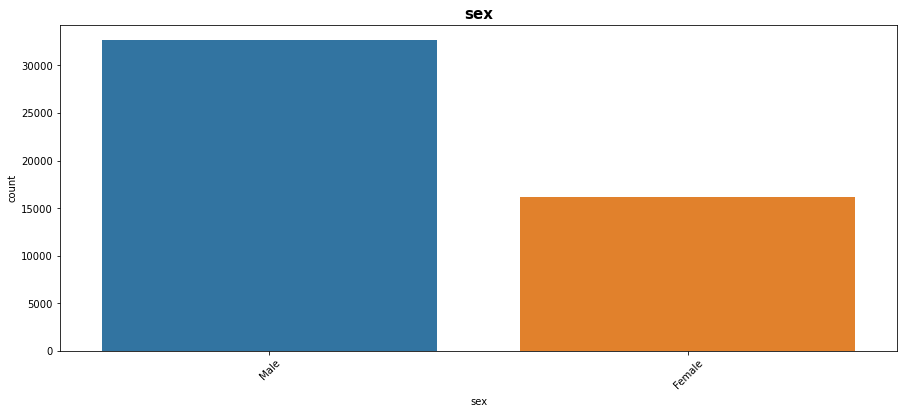

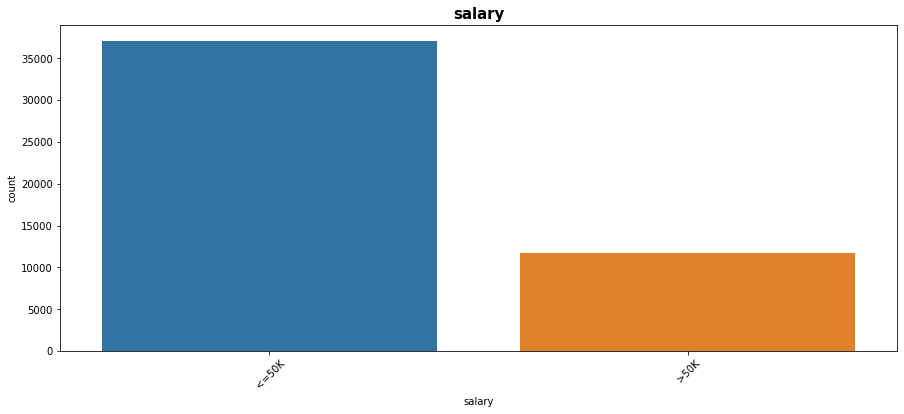

In [22]:
### Countplot to visualize the count of each category in each categorical feature

for feature in[feature for feature in categorical_feature if feature not in ['native_country']]:
    plt.figure(figsize=(15,6))
    sns.countplot(data=dataset,x=feature)
    plt.title('{}'.format(feature),fontsize=15,fontweight='bold')
    plt.xticks(rotation=45)
    plt.show();

# <span style='color:blue'> Observations </span>

1.The workclass feature has around 33K Private Employees, all other categories has less than 5K Employees whereas Never worked and Without pay has least employees.

2.In education feature, HS-grad has highest (around 16K) person, followed by some college (around 10K) and Bachelors (around 8K) people whereas preschool has least person in armed forces.

3.In Marital Status feature, Married-civ-Spouse has highest (around 22K) person, followed by never married (around 16K) and Divorced (around 6K) people whereas Married-AF-Spouse has least person.

4.In occupation feature, Ex-managerial, prof-speciality, craft repair has almost same employees and is highest. This is followed by admin clerical, sales and other service. The least employees are in

5.Husbands around 20K, not in family 12K, own child 7k and unmarried 5K contrubutes to nearly 90 percent of records in relationship feature.

6.Around 41K people are white by race, followed by 5K black, and Others.

7.There are more male Employees(around 32K) than female employees(16K).

8.Persons having salary less than 50K(35K Persons) are more in number than Persons having salary more than 50K(13K persons)

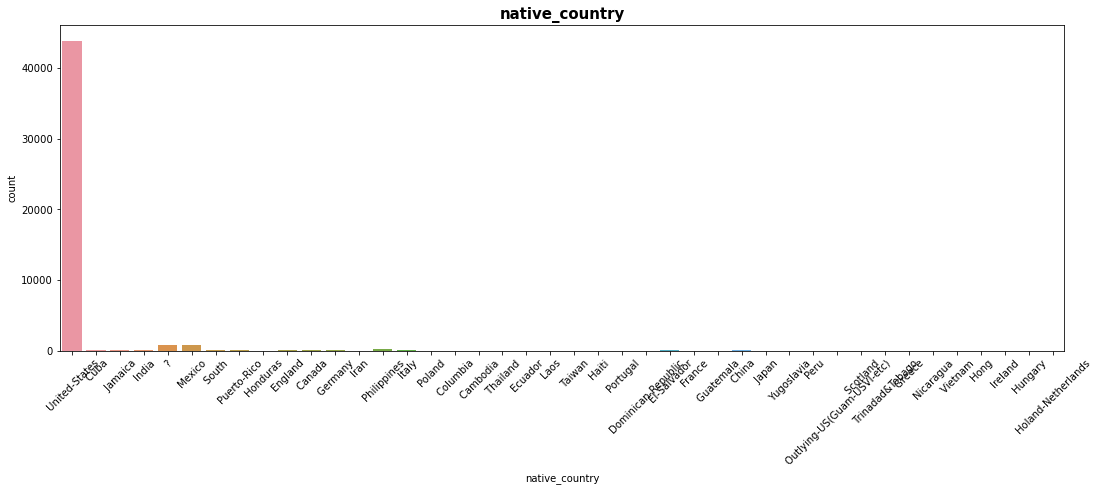

In [23]:
plt.figure(figsize=(18,6))
sns.countplot(data=dataset,x='native_country')
plt.title('native_country',fontweight='bold',fontsize=15)
plt.xticks(rotation=45)
plt.show();

# <span style='color:blue'> Observations </span>

1.In native country feature, Most employees are from united states (around 44k). The rest can be clubbed in others category.

# <span style='color:red'> 3.2 Numerical features </span>

In [24]:
Numerical_features = [feature for feature in dataset.columns if feature not in categorical_feature]
print(Numerical_features)

['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']


In [25]:
for feature in categorical_feature:
    print("feature '{}' has '{}' unique values\n".format(feature,dataset[feature].nunique()))

feature 'workclass' has '9' unique values

feature 'education' has '16' unique values

feature 'marital_status' has '7' unique values

feature 'occupation' has '15' unique values

feature 'relationship' has '6' unique values

feature 'race' has '5' unique values

feature 'sex' has '2' unique values

feature 'native_country' has '42' unique values

feature 'salary' has '2' unique values



# <span style='color:red'> 3.2.1 Discrete Numerical features </span>

In [26]:
Discrete_feature= [feature for feature in Numerical_features if dataset[feature].nunique()<=20]
Discrete_feature

['education_num']

# <span style='color:red'> 3.2.2 Countplot of education_number </span>

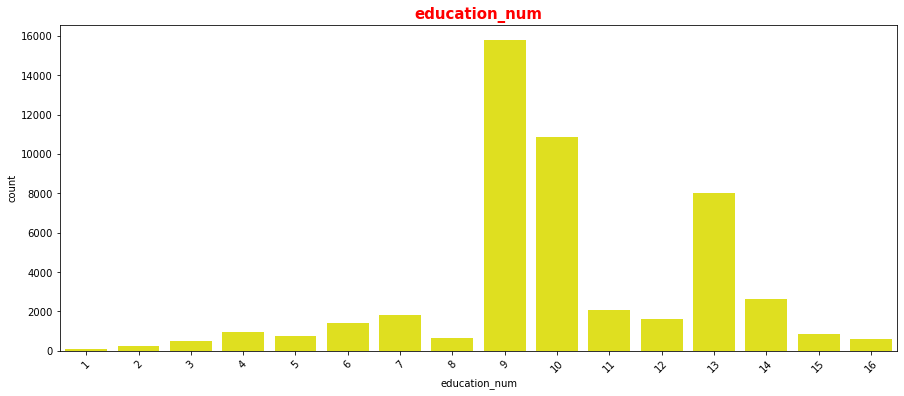

In [27]:
plt.figure(figsize=(15,6))
sns.countplot(data=dataset,x= 'education_num',color='yellow')
plt.title('education_num',fontsize=15,fontweight='bold',color='red')
plt.xticks(rotation=45)
plt.show();

# <span style='color:red'> 3.3 Continuous Numerical feature </span>

In [28]:
continuous_feature= [feature for feature in Numerical_features if feature not in Discrete_feature]
continuous_feature

['age', 'fnlwgt', 'capital_gain', 'capital_loss', 'hours_per_week']

# <span style='color:red'> 3.3.1 Distribution of Continuous Numerical Features </span>

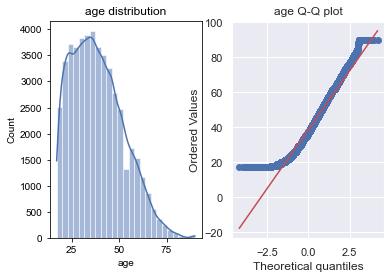

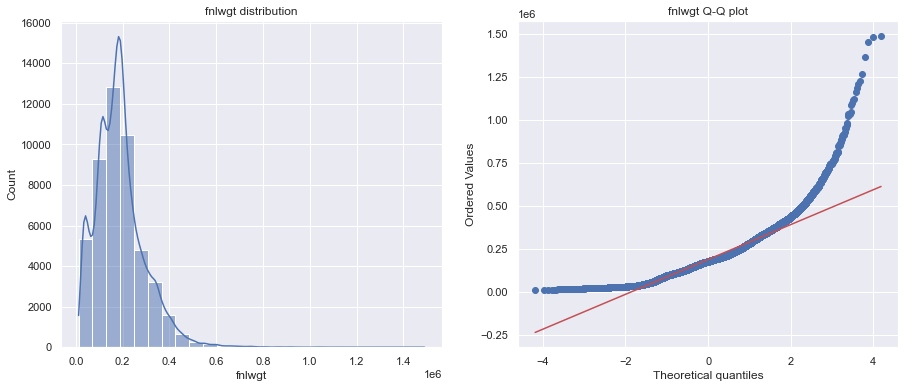

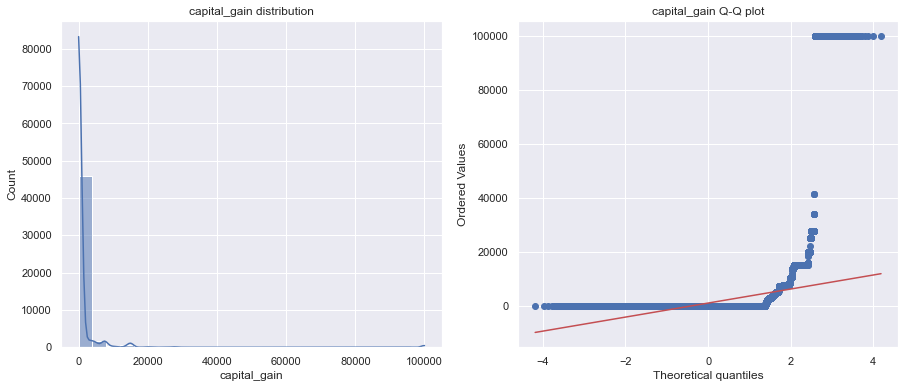

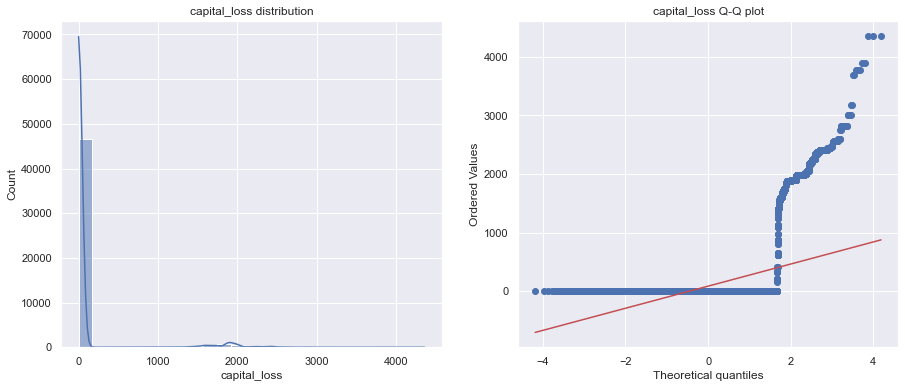

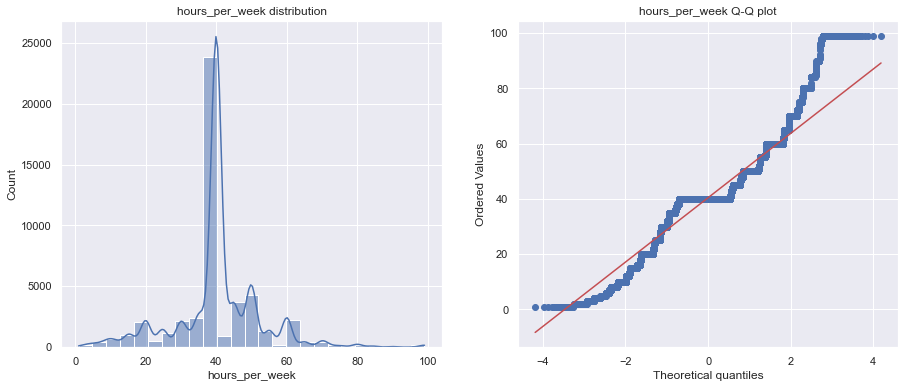

In [29]:
### Checking distribution of Continuous numerical features
for feature in (continuous_feature):
    plt.subplot(121)
    sns.set(rc={'figure.figsize':(15,6)})
    sns.histplot(data=dataset,x=feature,kde=True,bins=25)
    plt.title('{} distribution'.format(feature))
    
    plt.subplot(122)
    stats.probplot(dataset[feature],dist='norm',plot=plt)
    plt.title('{} Q-Q plot'.format(feature))
    plt.show();

# <span style='color:red'> 3.3.2 Continuous Numerical Features vs Dependent feature </span>

In [30]:
continuous_feature

['age', 'fnlwgt', 'capital_gain', 'capital_loss', 'hours_per_week']

In [31]:
print(categorical_feature)

['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'salary']


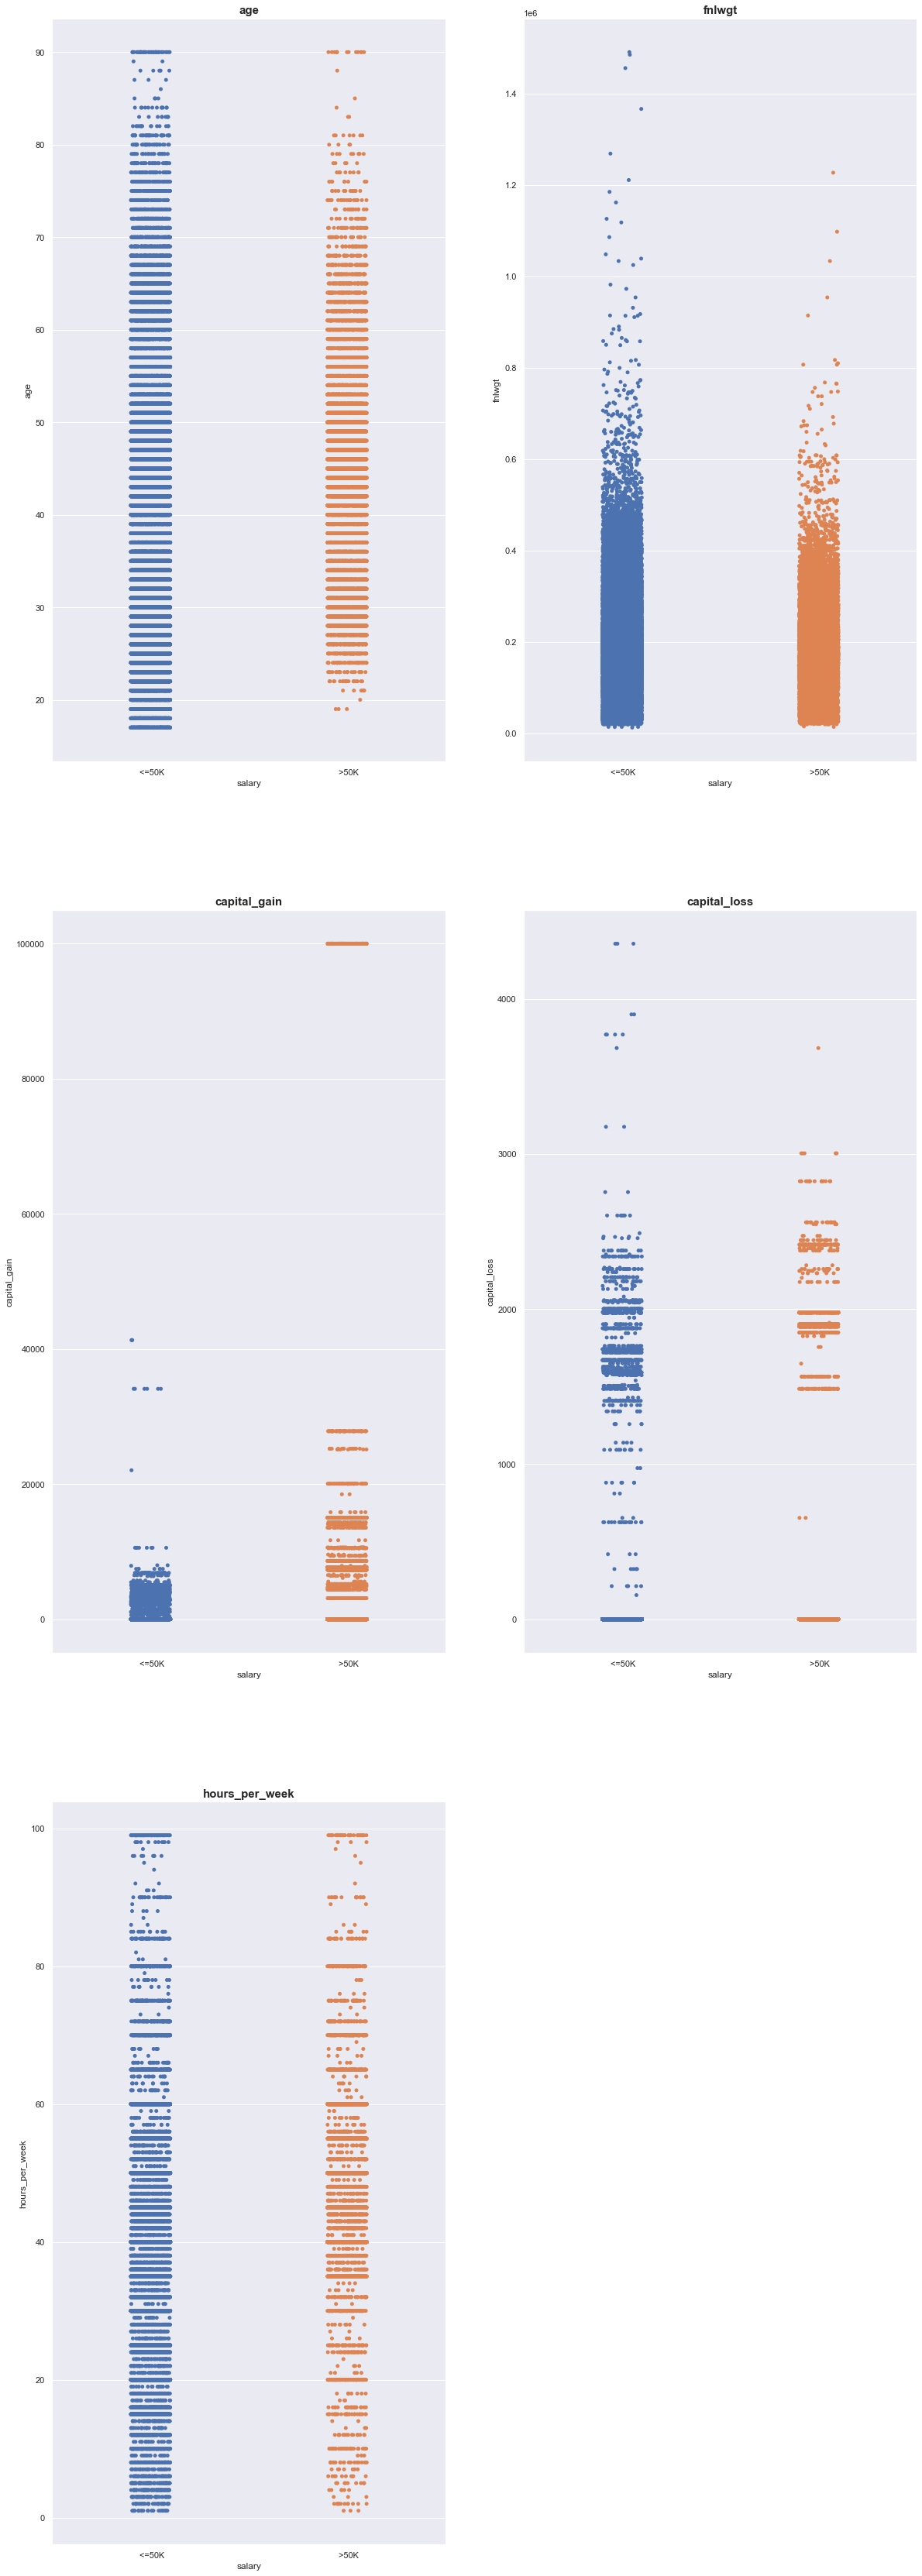

In [32]:
plt.figure(figsize=(20,60))
for feature in enumerate(continuous_feature):
    plt.subplot(3,2,feature[0]+1)
    sns.set(rc={'figure.figsize':(7,6)})
    sns.stripplot(data=dataset,y= feature[1],x='salary')
    plt.title('{}'.format(feature[1]),fontsize=15,fontweight='bold')
plt.show();

# <span style='color:red'> 3.3.3 Checking Outliers </span>

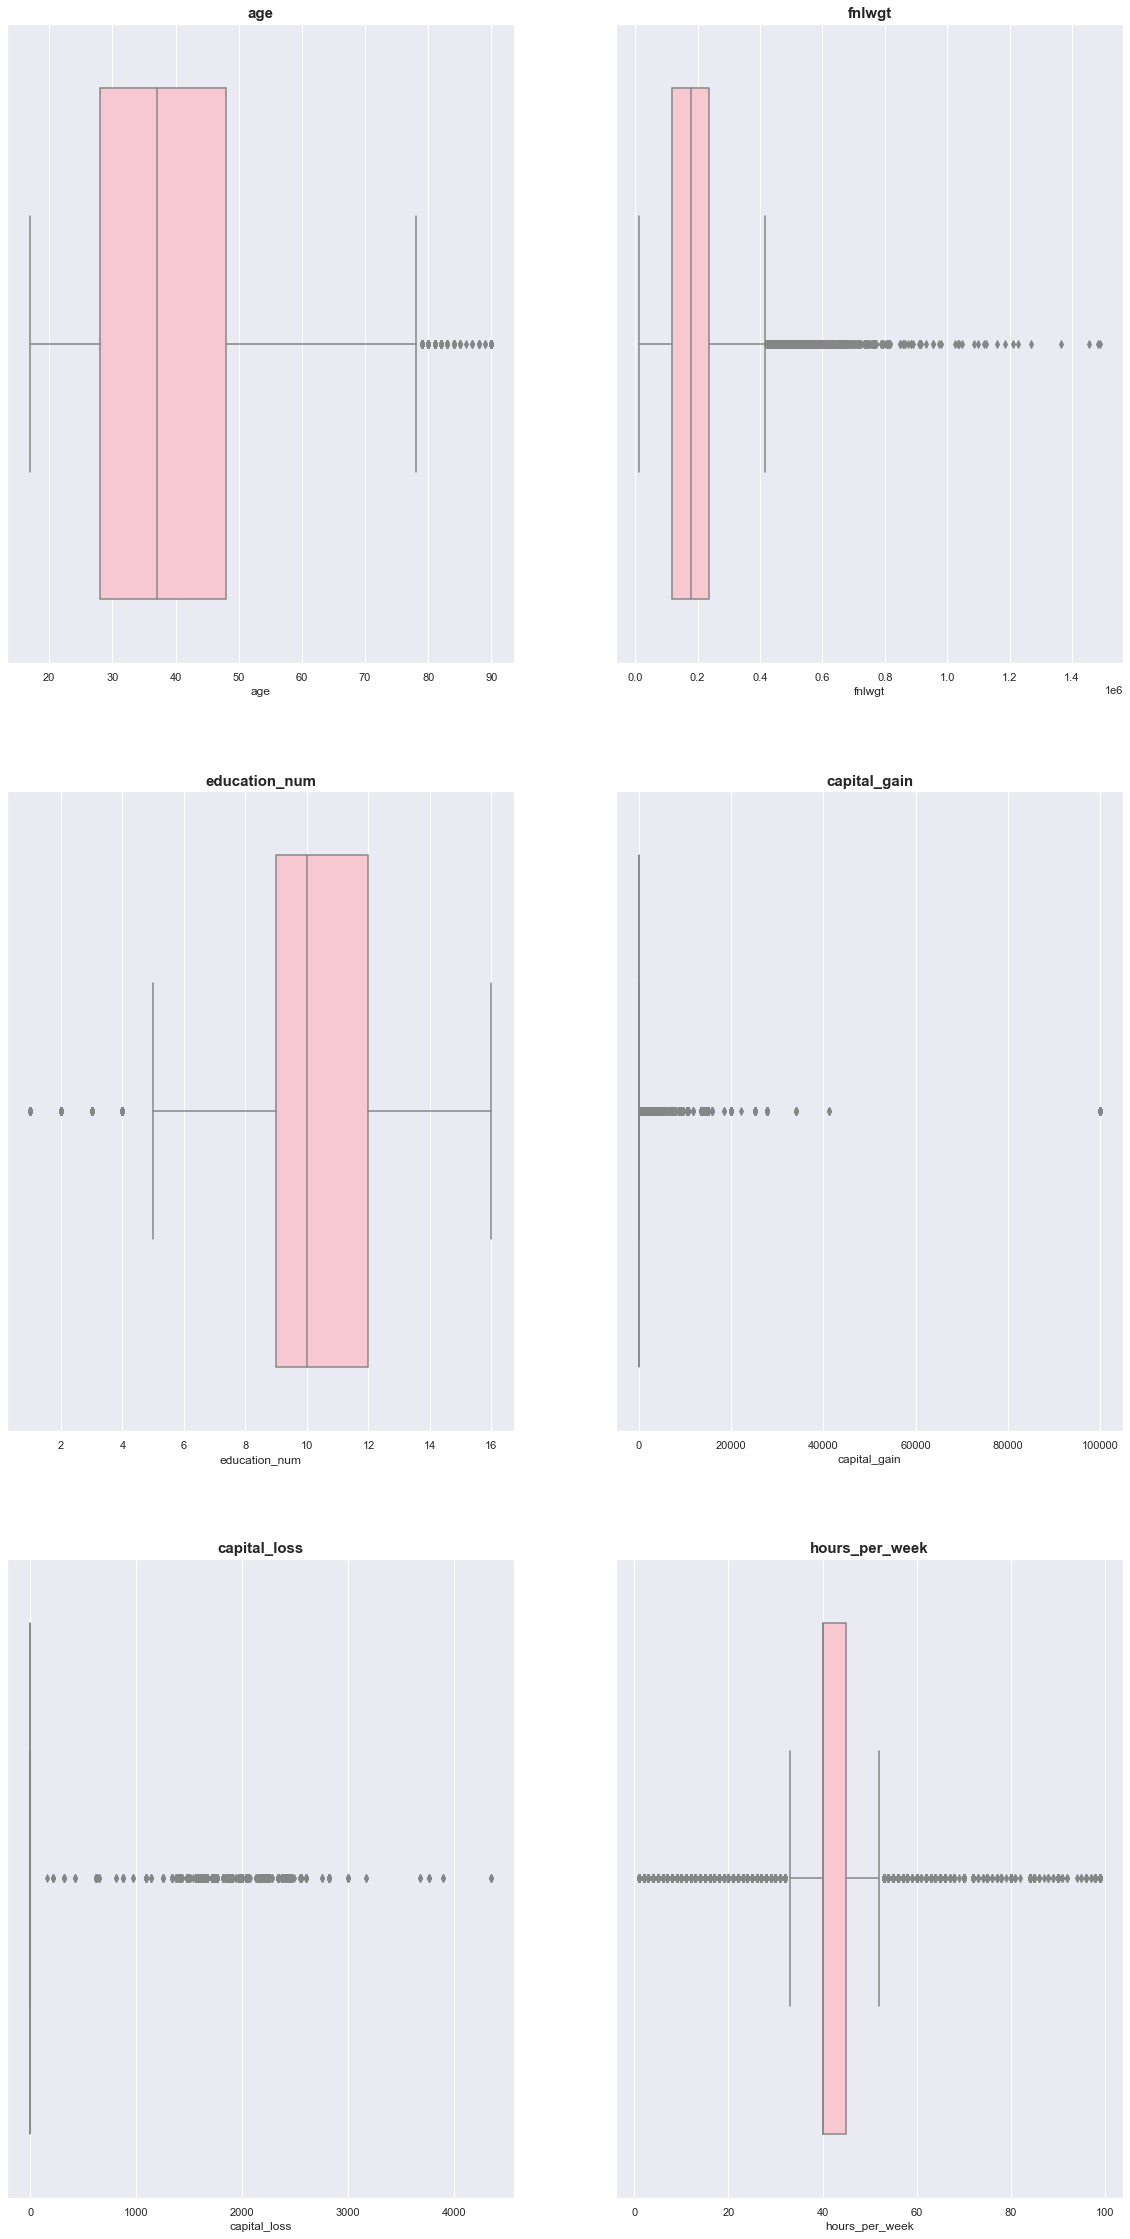

In [33]:
# Checking outliers in numerical features
plt.figure(figsize=(20,40))
for feature in enumerate(Numerical_features):
    plt.subplot(3,2,feature[0]+1)
    sns.set(rc={'figure.figsize':(10,6)})
    sns.boxplot(data=dataset, x=feature[1], color='pink')
    plt.title('{}'.format(feature[1]),fontsize=15,fontweight='bold')
plt.show();

In [34]:
dataset.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'salary'],
      dtype='object')

# <span style='color:red'> 3.4 Top and Bottom 10 feature values wrt count of records </span>

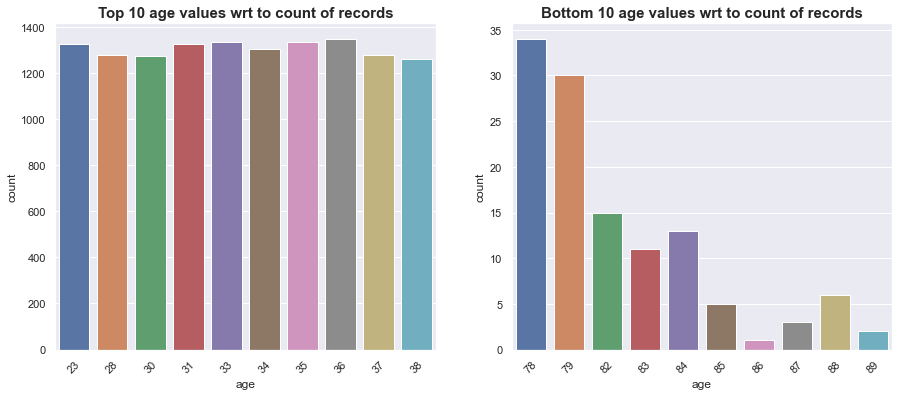

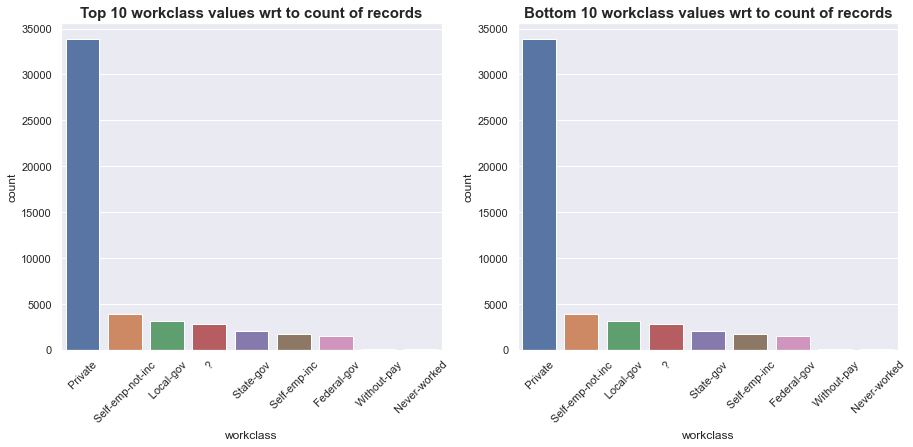

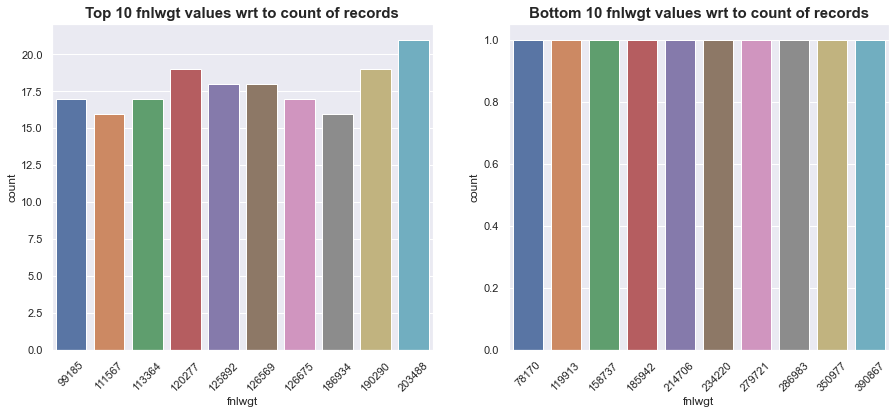

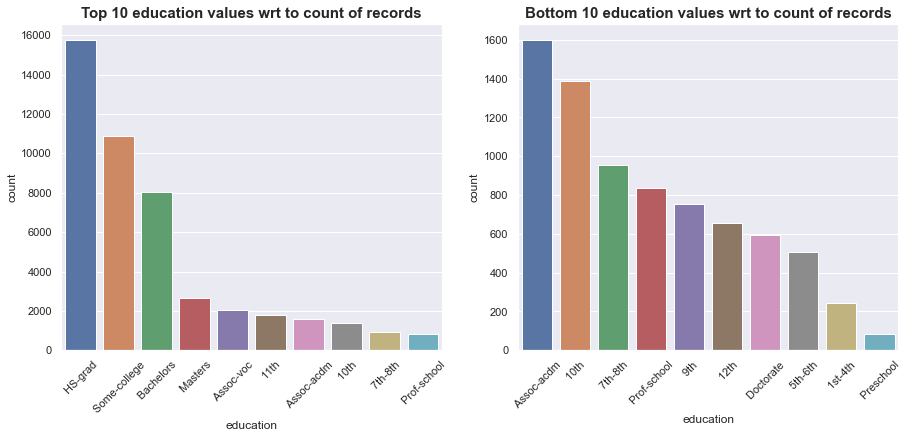

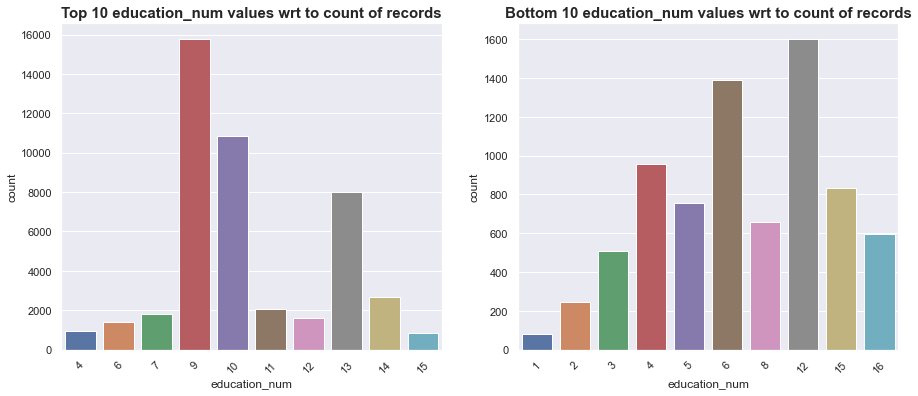

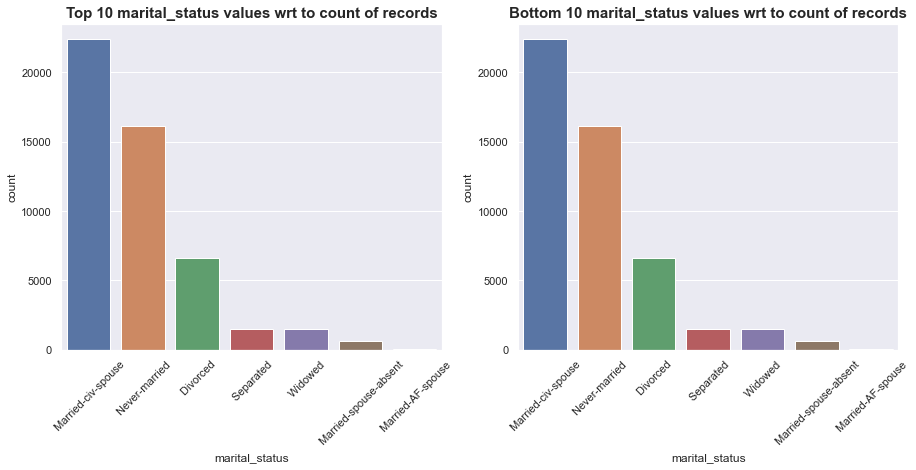

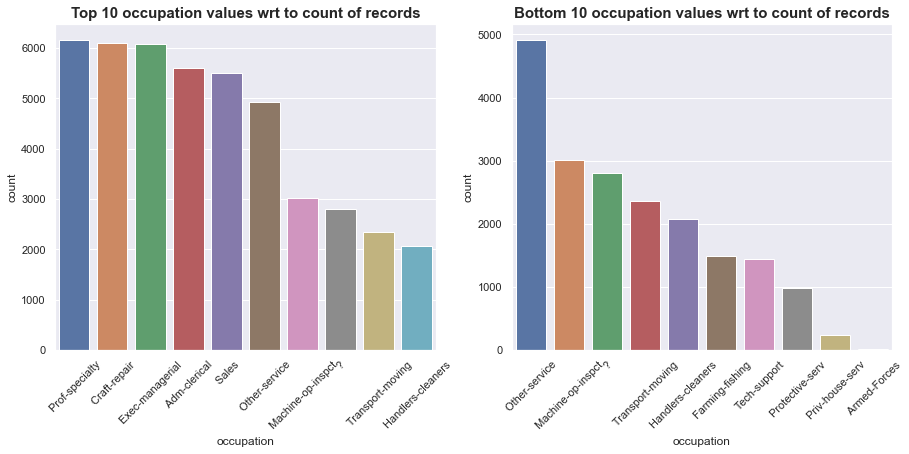

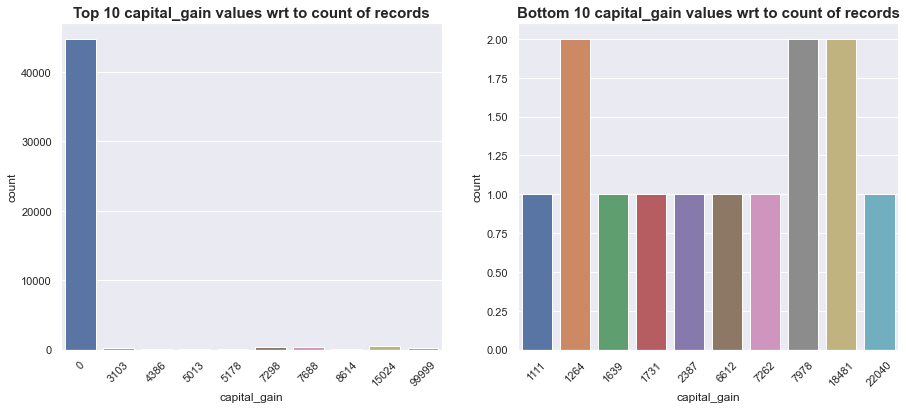

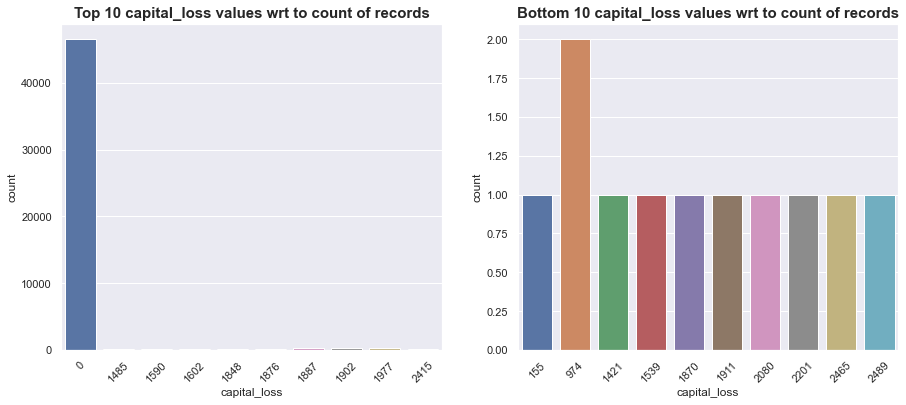

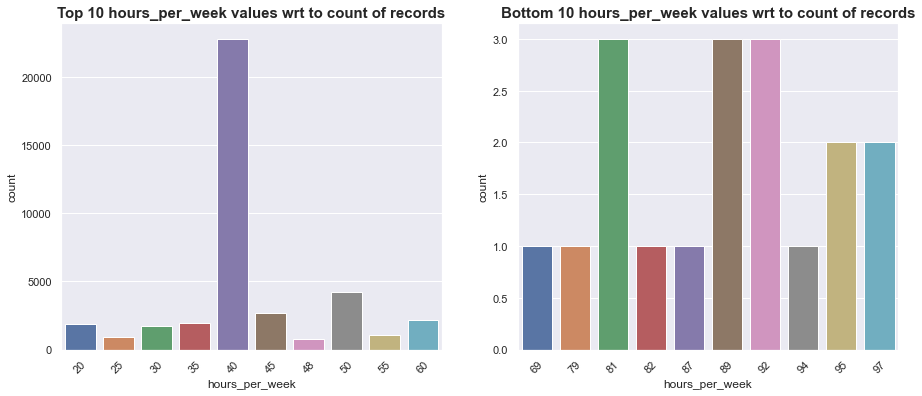

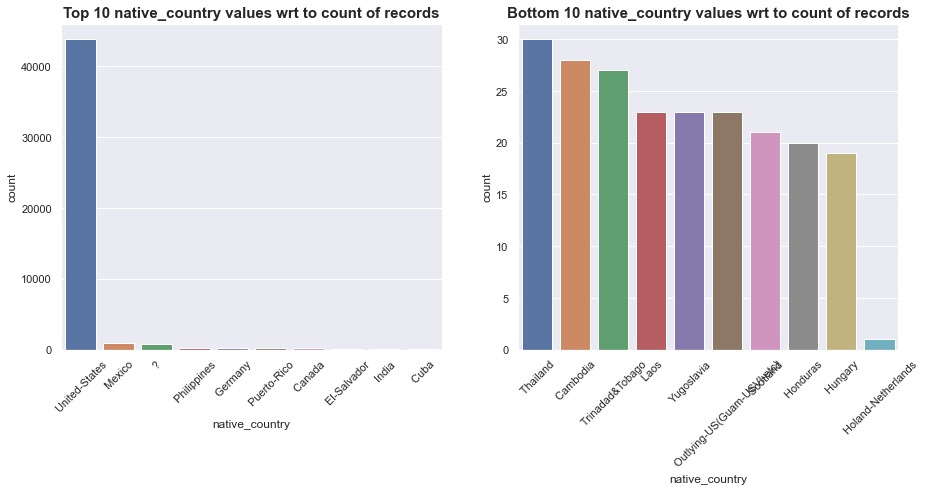

In [35]:
for feature in [feature for feature in dataset.columns if feature not in ['relationship', 'race', 'sex','salary']]:
    plt.figure(figsize=(15,6))
    plt.subplot(121)
    sns.barplot(data=dataset,y=dataset[feature].value_counts()[:10],x= dataset[feature].value_counts().index[:10] )
    plt.xlabel('{}'.format(feature))
    plt.ylabel('count')
    plt.xticks(rotation=45)
    plt.title('Top 10 {} values wrt to count of records'.format(feature),fontsize=15,fontweight='bold')
    
    plt.subplot(122)
    sns.barplot(data=dataset,y=dataset[feature].value_counts()[-10:],x=dataset[feature].value_counts().index[-10:])
    plt.xlabel('{}'.format(feature))
    plt.ylabel('count')
    plt.xticks(rotation=45)
    plt.title('Bottom 10 {} values wrt to count of records'.format(feature),fontsize=15,fontweight='bold')
    plt.show();

# <span style='color:red'> 3.5 Top and Bottom 10 Numerical feature values wrt Mean of records </span>

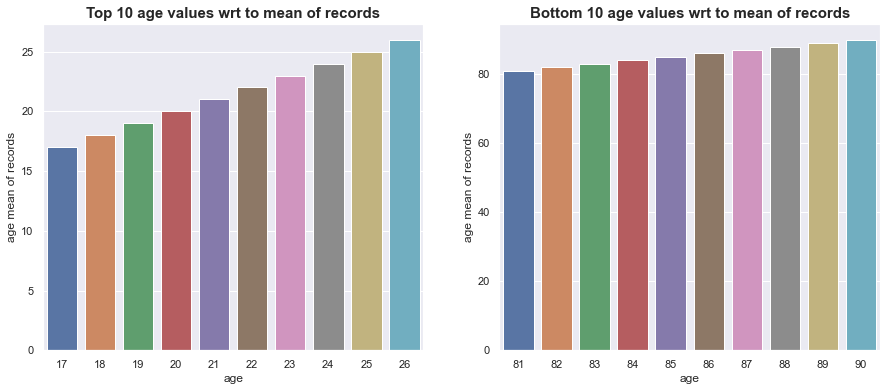

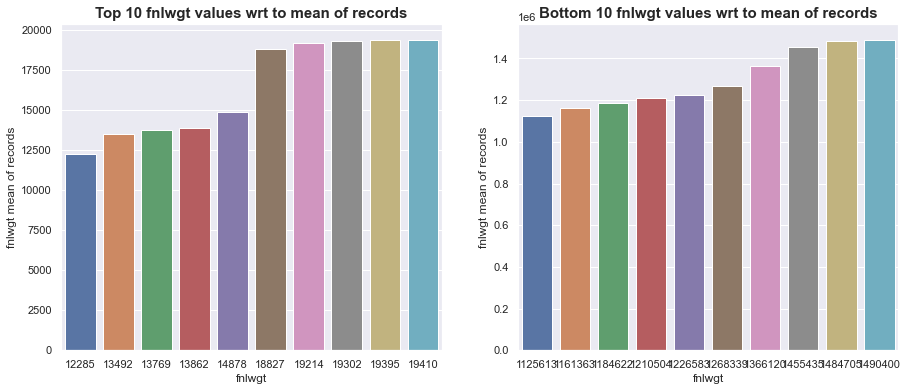

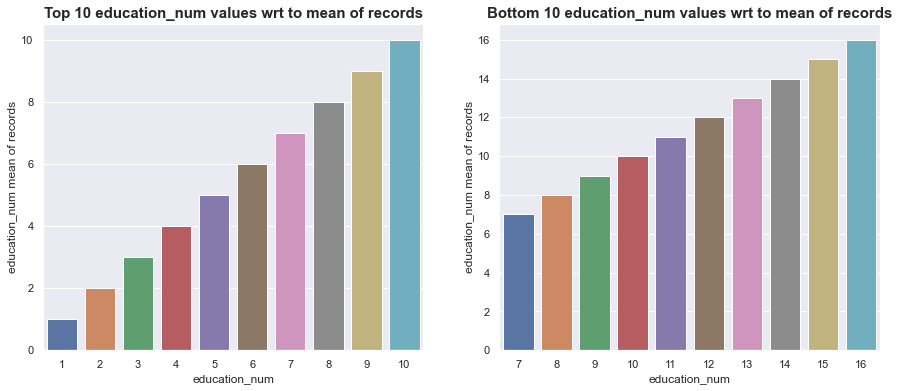

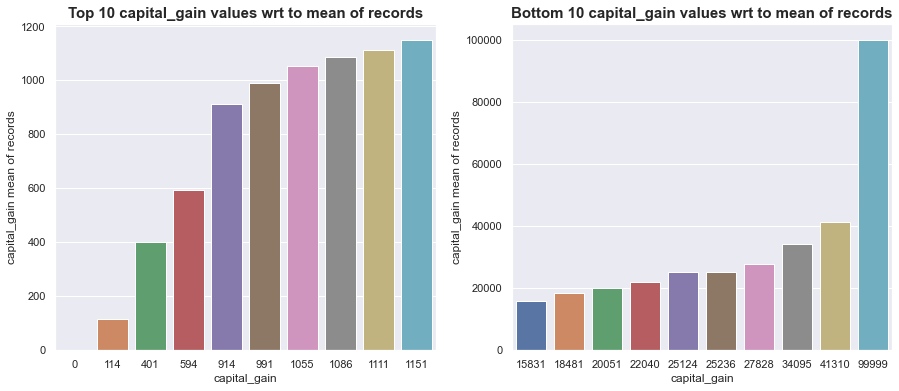

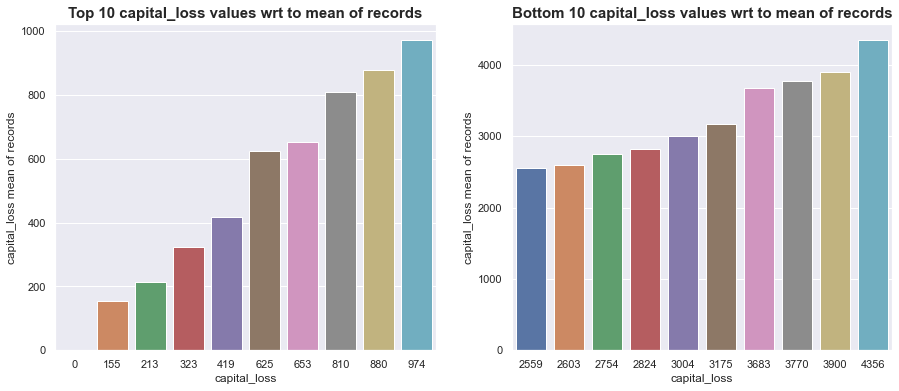

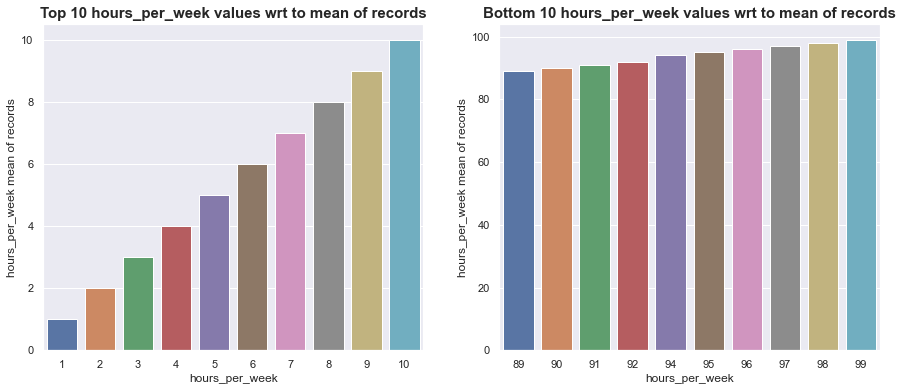

In [36]:
for feature in Numerical_features:
    plt.figure(figsize=(15,6))
    plt.subplot(121)
    sns.barplot(y=dataset.groupby(feature)[feature].mean().sort_values(ascending=True)[:10],x=dataset.groupby(feature)[feature].mean().sort_values(ascending=True).index[:10])
    plt.ylabel('{} mean of records'.format(feature))
    plt.xlabel('{}'.format(feature))
    plt.title('Top 10 {} values wrt to mean of records'.format(feature),fontsize=15,fontweight='bold')
    
    plt.subplot(122)
    sns.barplot(y=dataset.groupby(feature)[feature].mean().sort_values(ascending=True)[-10:],x=dataset.groupby(feature)[feature].mean().sort_values(ascending=True).index[-10:])
    plt.ylabel('{} mean of records'.format(feature))
    plt.xlabel('{}'.format(feature))
    plt.title('Bottom 10 {} values wrt to mean of records'.format(feature),fontsize=15,fontweight='bold')
plt.show();

# <span style='color:red'> 3.6 Top and Bottom 10 Numerical feature values wrt Sum of records </span>

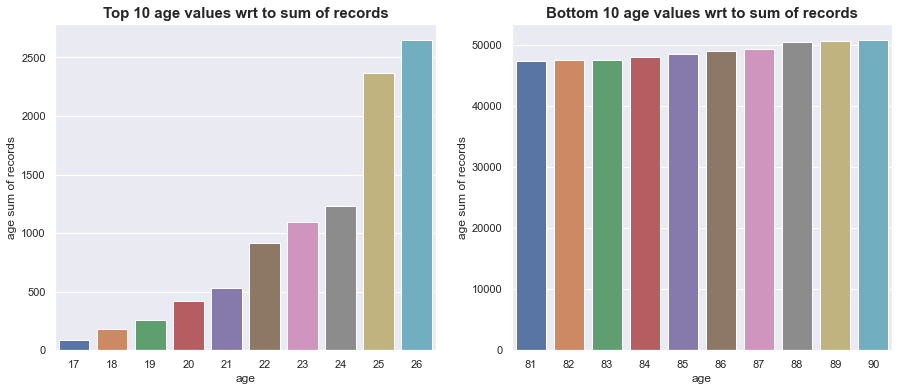

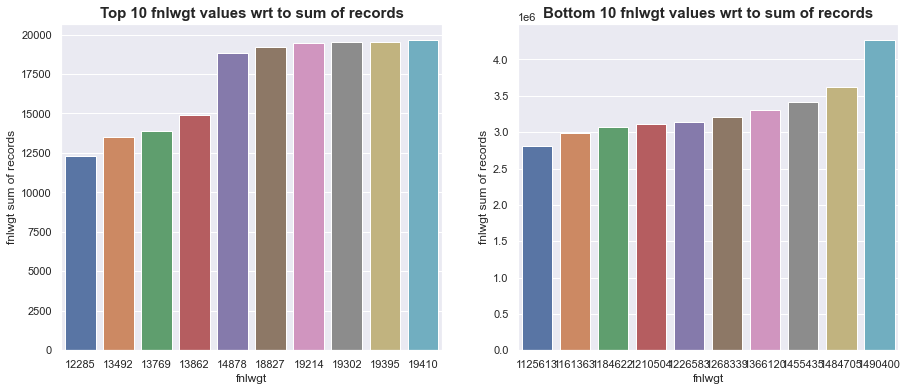

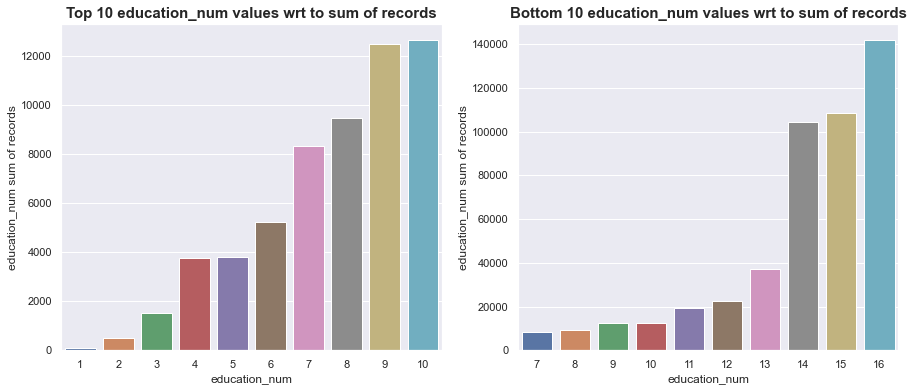

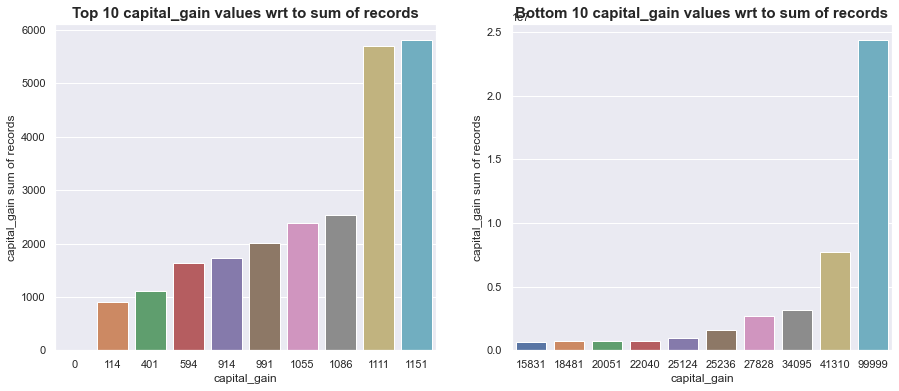

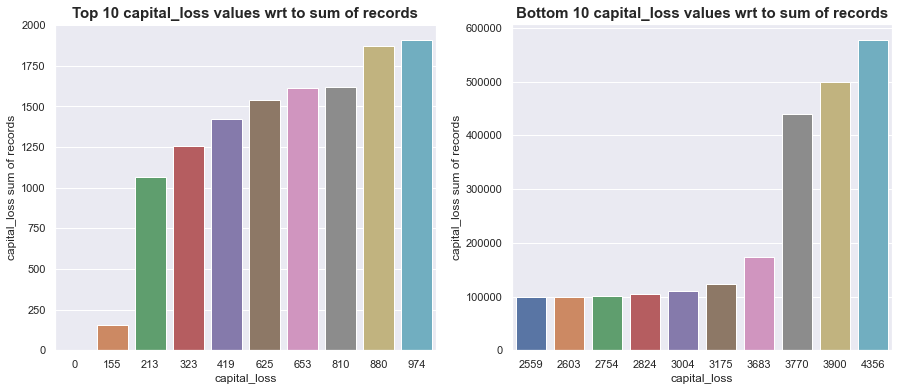

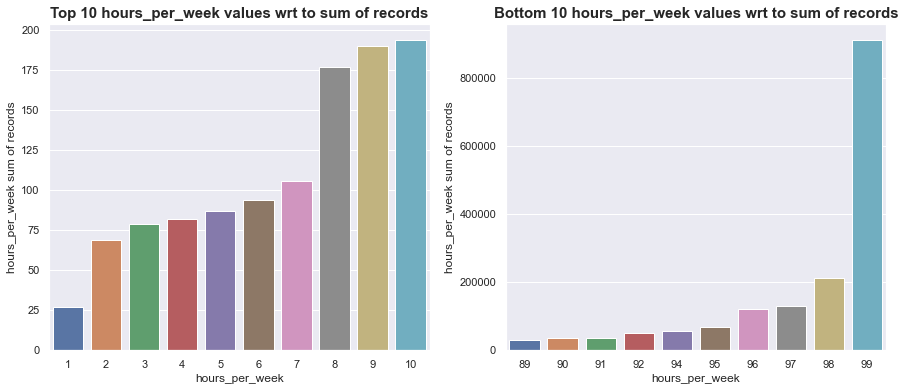

In [37]:
for feature in Numerical_features:
    plt.figure(figsize=(15,6))
    plt.subplot(121)
    sns.barplot(y=dataset.groupby(feature)[feature].sum().sort_values(ascending=True)[:10],x= dataset.groupby(feature)[feature].mean().sort_values(ascending=True).index[:10])
    plt.ylabel('{} sum of records'.format(feature))
    plt.xlabel('{}'.format(feature))
    plt.title('Top 10 {} values wrt to sum of records'.format(feature),fontsize=15,fontweight='bold')
    
    plt.subplot(122)
    sns.barplot(y=dataset.groupby(feature)[feature].sum().sort_values(ascending=True)[-10:],x= dataset.groupby(feature)[feature].mean().sort_values(ascending=True).index[-10:])
    plt.ylabel('{} sum of records'.format(feature))
    plt.xlabel('{}'.format(feature))
    plt.title('Bottom 10 {} values wrt to sum of records'.format(feature),fontsize=15,fontweight='bold')
plt.show();  

# <span style='color:red'> 4.0 Data Cleaning Continued </span>

In [38]:
for feature in categorical_feature:
    print('feature: {} \n{}\n'.format(feature,dataset[feature].unique()))

feature: workclass 
[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']

feature: education 
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']

feature: marital_status 
[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']

feature: occupation 
[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']

feature: relationship 
[' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']

feature: race 
[' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']

feature: sex 
[' Mal

In [39]:
### creating function to clean columns
def feature_cleaner_custom(in_dataset, in_feature_list):
    for feature in in_feature_list:
        in_dataset[feature]=in_dataset[feature].str.replace(' ','')
        in_dataset[feature]=in_dataset[feature].str.replace('-','_')
    return in_dataset

In [41]:
### cleaning values in features
dataset= feature_cleaner_custom(dataset,categorical_feature)

In [42]:
### replacing ? with nan values
dataset.replace('?', np.nan, inplace=True)

In [43]:
### checking cleaned feature values
for feature in categorical_feature:
    print('feature: {} \n{}\n'.format(feature,dataset[feature].unique()))

feature: workclass 
['State_gov' 'Self_emp_not_inc' 'Private' 'Federal_gov' 'Local_gov' nan
 'Self_emp_inc' 'Without_pay' 'Never_worked']

feature: education 
['Bachelors' 'HS_grad' '11th' 'Masters' '9th' 'Some_college' 'Assoc_acdm'
 'Assoc_voc' '7th_8th' 'Doctorate' 'Prof_school' '5th_6th' '10th'
 '1st_4th' 'Preschool' '12th']

feature: marital_status 
['Never_married' 'Married_civ_spouse' 'Divorced' 'Married_spouse_absent'
 'Separated' 'Married_AF_spouse' 'Widowed']

feature: occupation 
['Adm_clerical' 'Exec_managerial' 'Handlers_cleaners' 'Prof_specialty'
 'Other_service' 'Sales' 'Craft_repair' 'Transport_moving'
 'Farming_fishing' 'Machine_op_inspct' 'Tech_support' nan
 'Protective_serv' 'Armed_Forces' 'Priv_house_serv']

feature: relationship 
['Not_in_family' 'Husband' 'Wife' 'Own_child' 'Unmarried' 'Other_relative']

feature: race 
['White' 'Black' 'Asian_Pac_Islander' 'Amer_Indian_Eskimo' 'Other']

feature: sex 
['Male' 'Female']

feature: native_country 
['United_States' 'Cub

In [44]:
### checking null values in dataset
dataset.isnull().sum()

age                  0
workclass         2799
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     856
salary               0
dtype: int64

In [48]:
### custom nan replace function
def feature_cat_nan_custom(in_data,in_feature_list):
    for feature in in_feature_list:
        value=in_data[feature].mode()[0]
        in_data[feature]=in_data[feature].fillna(value)
    return in_data

In [49]:
### replacing nan values in categorical features
missing_cat_value = ['workclass','occupation','native_country']

dataset= feature_cat_nan_custom(dataset , missing_cat_value)

In [50]:
dataset.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
salary            0
dtype: int64

In [52]:
### checking numerical features

for feature in Numerical_features:
    print('feature:{} \n{}\n'.format(feature,dataset[feature].unique()))

feature:age 
[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87 89]

feature:fnlwgt 
[ 77516  83311 215646 ... 173449  89686 350977]

feature:education_num 
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]

feature:capital_gain 
[ 2174     0 14084  5178  5013  2407 14344 15024  7688 34095  4064  4386
  7298  1409  3674  1055  3464  2050  2176   594 20051  6849  4101  1111
  8614  3411  2597 25236  4650  9386  2463  3103 10605  2964  3325  2580
  3471  4865 99999  6514  1471  2329  2105  2885 25124 10520  2202  2961
 27828  6767  2228  1506 13550  2635  5556  4787  3781  3137  3818  3942
   914   401  2829  2977  4934  2062  2354  5455 15020  1424  3273 22040
  4416  3908 10566   991  4931  1086  7430  6497   114  7896  2346  3418
  3432  2907  1151  2414  2290 15831 41310  4508  2538  3456  6418  1848
  3887  5721  

# <span style='color:red'> 5.0 Handling Rare categories </span>

In [53]:
for feature in categorical_feature:
    print(dataset[feature].value_counts()/dataset[feature].shape[0]*100)

Private             75.139819
Self_emp_not_inc     7.909778
Local_gov            6.424518
State_gov            4.058345
Self_emp_inc         3.470387
Federal_gov          2.933645
Without_pay          0.043021
Never_worked         0.020486
Name: workclass, dtype: float64
HS_grad         32.321308
Some_college    22.266609
Bachelors       16.430049
Masters          5.441173
Assoc_voc        4.220187
11th             3.712126
Assoc_acdm       3.279864
10th             2.845553
7th_8th          1.954397
Prof_school      1.708561
9th              1.548768
12th             1.343904
Doctorate        1.216889
5th_6th          1.040706
1st_4th          0.501915
Preschool        0.167988
Name: education, dtype: float64
Married_civ_spouse       45.832053
Never_married            32.978920
Divorced                 13.582447
Separated                 3.134411
Widowed                   3.109827
Married_spouse_absent     1.286543
Married_AF_spouse         0.075799
Name: marital_status, dtype: float6

In [54]:
### Clubbing rare categories in custom Other category using less than 10 percent of record threshold

for feature in categorical_feature:
        frequency = dataset[feature].value_counts(normalize=True)
        mapping=dataset[feature].map(frequency)
        dataset[feature]=dataset[feature].mask(mapping <0.10,'other')
        

In [55]:
for feature in categorical_feature:
    print(dataset[feature].value_counts()/dataset[feature].shape[0]*100)

Private    75.139819
other      24.860181
Name: workclass, dtype: float64
HS_grad         32.321308
other           28.982033
Some_college    22.266609
Bachelors       16.430049
Name: education, dtype: float64
Married_civ_spouse    45.832053
Never_married         32.978920
Divorced              13.582447
other                  7.606580
Name: marital_status, dtype: float64
other              23.794891
Prof_specialty     18.388544
Craft_repair       12.511011
Exec_managerial    12.463893
Adm_clerical       11.488743
Sales              11.275685
Other_service      10.077234
Name: occupation, dtype: float64
Husband          40.376539
Not_in_family    25.745191
Own_child        15.520456
Unmarried        10.497204
other             7.860611
Name: relationship, dtype: float64
White    85.501813
other    14.498187
Name: race, dtype: float64
Male      66.848995
Female    33.151005
Name: sex, dtype: float64
United_States    91.504312
other             8.495688
Name: native_country, dtype: float

# <span style='color:red'> 5.1 Visualizing Rare categories </span>

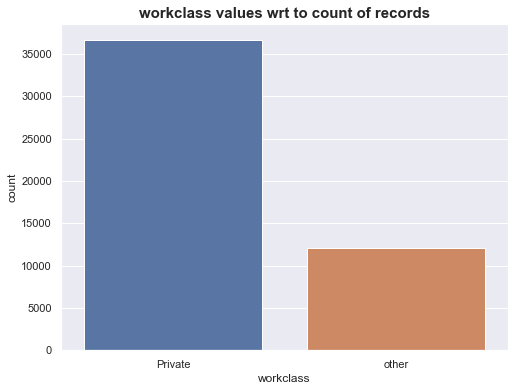

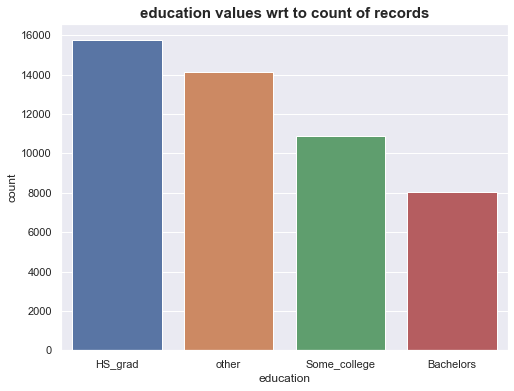

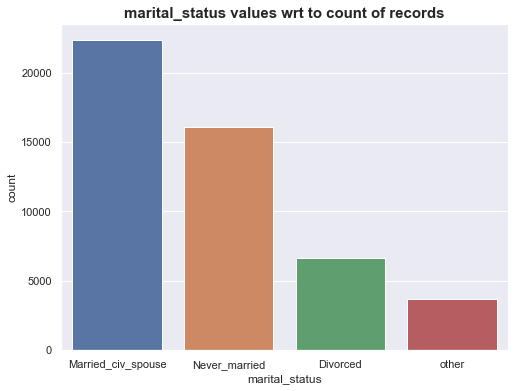

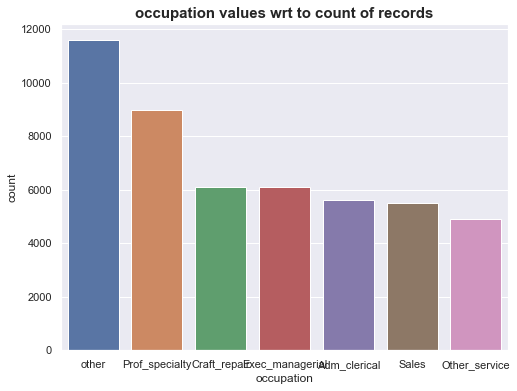

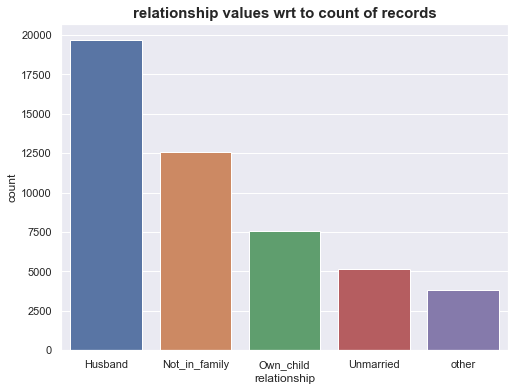

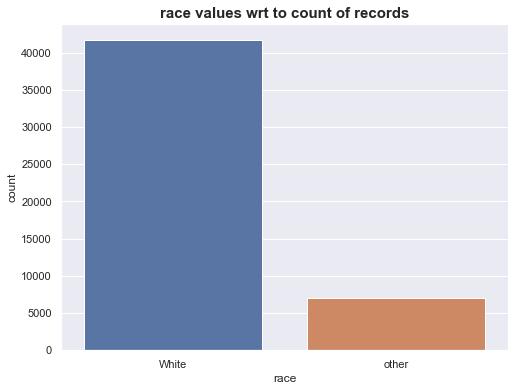

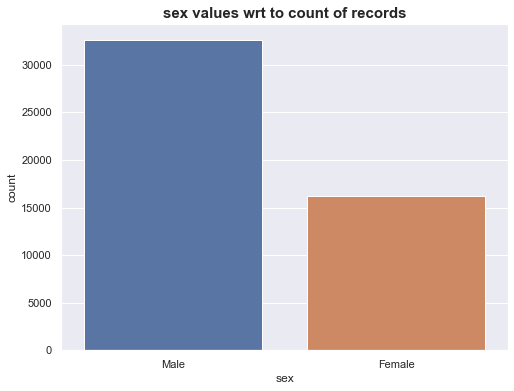

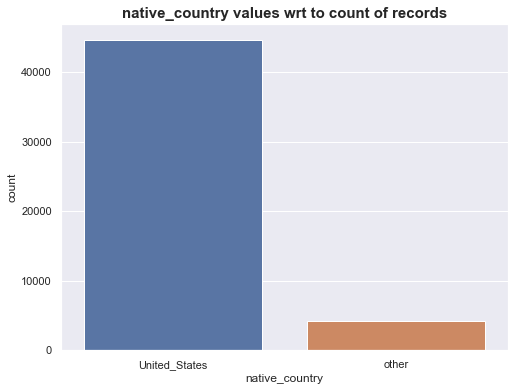

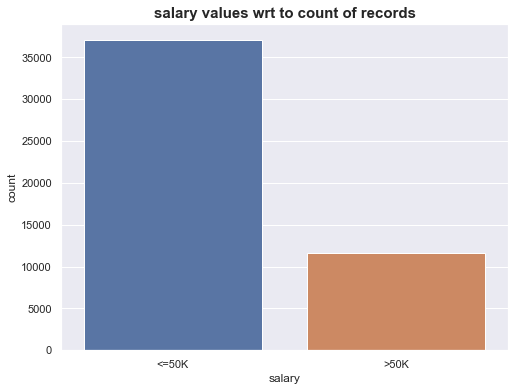

In [61]:
for feature in categorical_feature:
    plt.figure(figsize=(8,6))
    sns.barplot(y=dataset[feature].value_counts(),x=dataset[feature].value_counts().index)
    plt.xlabel('{}'.format(feature))
    plt.ylabel('count')
    plt.title('{} values wrt to count of records'.format(feature),fontweight='bold',fontsize=15)
plt.show();

# <span style='color:red'> 6.0 Encoding Dependent feature </span>

In [63]:
dataset['salary']=dataset['salary'].replace('<=50K',0)
dataset['salary']=dataset['salary'].replace('>50K',1)
dataset['salary']=dataset['salary'].astype('int64')


In [64]:
dataset.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,other,77516,Bachelors,13,Never_married,Adm_clerical,Not_in_family,White,Male,2174,0,40,United_States,0
1,50,other,83311,Bachelors,13,Married_civ_spouse,Exec_managerial,Husband,White,Male,0,0,13,United_States,0
2,38,Private,215646,HS_grad,9,Divorced,other,Not_in_family,White,Male,0,0,40,United_States,0
3,53,Private,234721,other,7,Married_civ_spouse,other,Husband,other,Male,0,0,40,United_States,0
4,28,Private,338409,Bachelors,13,Married_civ_spouse,Prof_specialty,other,other,Female,0,0,40,other,0


# <span style='color:red'> 7.0 Correlation and HeatMap </span>

In [65]:
corr=dataset.corr()
corr

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,salary
age,1.000000,-0.076474,0.030760,0.077221,0.056908,0.071322,0.230335
fnlwgt,-0.076474,1.000000,-0.038798,-0.003713,-0.004375,-0.013516,-0.006376
education_num,0.030760,-0.038798,1.000000,0.125186,0.080969,0.143872,0.332746
capital_gain,0.077221,-0.003713,0.125186,1.000000,-0.031460,0.082154,0.223014
capital_loss,0.056908,-0.004375,0.080969,-0.031460,1.000000,0.054440,0.147527
hours_per_week,0.071322,-0.013516,0.143872,0.082154,0.054440,1.000000,0.227649
salary,0.230335,-0.006376,0.332746,0.223014,0.147527,0.227649,1.000000


<AxesSubplot:>

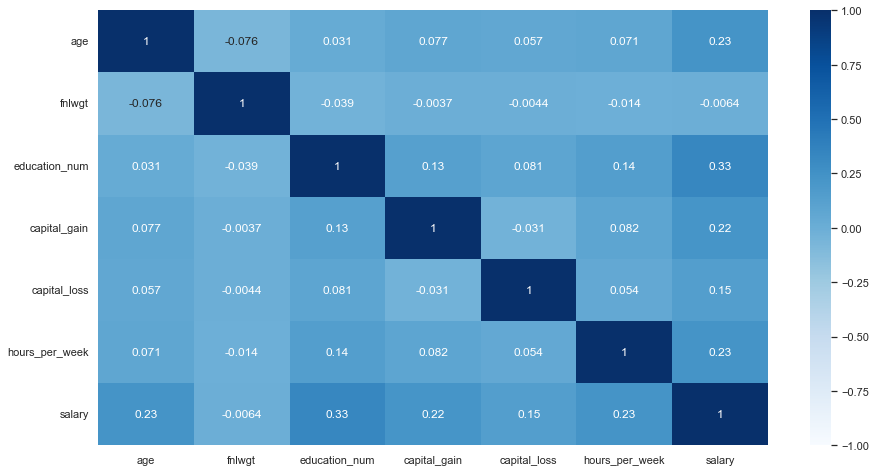

In [68]:
### Plotting heatmap for visualising the correlation between features

sns.set(rc={'figure.figsize':(15,8)})
sns.heatmap(data=corr,vmin=-1,vmax=1,annot=True,cmap='Blues')

# <span style='color:red'> 8.0 Uplodaing data to MongoDB </span>

In [69]:
import pymongo
from pymongo import MongoClient

In [70]:
client=MongoClient('Localhost',27017)

In [71]:
db=client['census-income']
collection=db['census_income_data']

In [72]:
### Converting dataframe to dict so it can be uploaded to MongoDB
dataset.reset_index(inplace=True)
dataset_dic=dataset.to_dict('records')

In [74]:
# Insert collection to MongoDB
collection.insert_many(dataset_dic)

In [75]:
dataset.to_csv('Census_income_cleaned.csv')